# 0. Введение.

Привет! Эта лабораторная работа про то, какие есть способы сбора данных с сайтов. Давай начнём с небольшого введения про то, как её выполнять.

В коде и тексте этой лабораторной работы встречаются блоки двух видов. Первый из них будет в ячейках с кодом и выглядит он так:


```
# TODO
```

Это означает, что тут надо написать одну или несколько строчек кода.

Второй тип блоков выглядит так - <font color='violet'> \# TODO </font>. Он означает, что тут надо написать какие-то свои мысли и выводы. Когда будешь писать, пожалуйста, не меняй цвет текста твоего ответа - это упростит проверку.

В тексте внизу собраны все нужные библиотечки - запускаем её и начинаем выполнение лабораторной работы! :)

In [ ]:
from urllib.request import urlopen
from urllib.parse import urlparse, urldefrag, urljoin
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import json

# Часть 1. Работа со статическими страницами при помощи bs4. 3 балла.



В этой части вам не нужно работать с маркетплейсами или сложными крупными онлайн-магазинами, достаточно поиграться с **небольшим нишевым магазинчиком**.

Пример сайта, подходящего под задание:
- Семена овощей - Аэлита https://ailita-shop.ru/


Вам нужно найти ПОХОЖИЙ сайт без динамической подгрузки контента (таких в интернете очень много)

Для формирования представления о магазине достаточно посмотреть на товары одной выбранной категории.

На странице товара **должна содержалась следующая информация, которую вам надо будет получить в рамках задания**:

- Название
- Картинка
- Характеристики (минимум 1)
- Описание

Описание должно быть достаточно большим (больше одного предложения) и содержать информацию о характеристиках товара. Например, как это бывает на алиэкспрессе

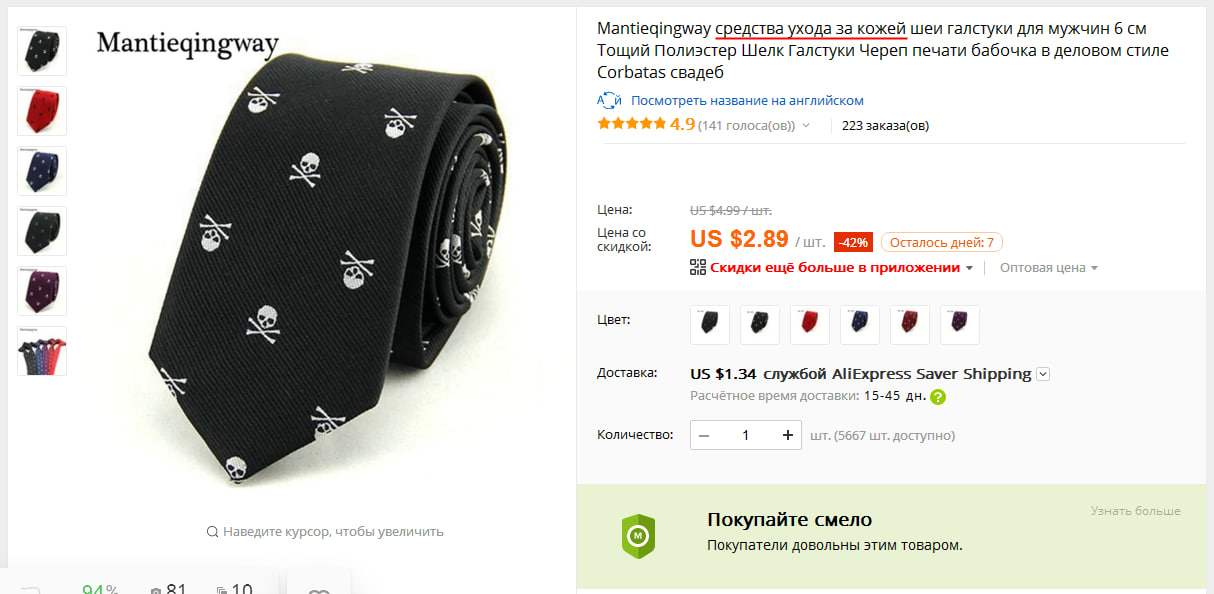

## Исследование

Выберите магазин, который удовлетворяет описанию магазина-конкурента:

<font color='violet'> https://stroydiam.ru </font>

Выберите категорию товаров и посмотрите на предлагаемые карточки товаров. **Категория должна содержать 20+ карточек, чтобы можно было составить более полное мнение о товарах в магазине.**

In [ ]:
url = "https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/"

Откройте ссылку с помощью библиотеки `urllib` и загрузите данные в переменную `html`. Не забудь про кодировку!

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ru" lang="ru"  >
<head><link rel="next" href="https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/?PAGEN_1=2"  /><link rel="canonical" href="https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/" />
	<title>Алмазные гибкие шлифовальный круги АГШК (черепашки) по бетону | СтройДиам</title>
	<meta name="viewport" content="initial-scale=1.0, width=device-width" />
	<meta name="HandheldFriendly" content="true" />
	<meta name="yes" content="yes" />
	<meta name="apple-mobile-web-app-status-bar-style" content="black" />
	<meta name="SKYPE_TOOLBAR" content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" />
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta name="keywords" content="Алмазные гибкие шлифовальный круги, агшк, по бетону" />
<meta name="description" content="В магазине СтройДиам можно купить Алмазные гибкие шлифо
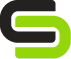
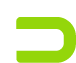

In [ ]:
response = urlopen(url)
html = response.read().decode('utf-8')
print(html)

Распарсьте текстовую информация на странице, используя библиотеку `bs4`



<!DOCTYPE html>

<html lang="ru" xml:lang="ru" xmlns="http://www.w3.org/1999/xhtml">
<head><link href="https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/?PAGEN_1=2" rel="next"/><link href="https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/" rel="canonical"/>
<title>Алмазные гибкие шлифовальный круги АГШК (черепашки) по бетону | СтройДиам</title>
<meta content="initial-scale=1.0, width=device-width" name="viewport"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="yes" name="yes"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Алмазные гибкие шлифовальный круги, агшк, по бетону" name="keywords"/>
<meta content="В магазине СтройДиам можно купить Алмазные гибкие шлифовальные круги по бетону (Черепашка). 
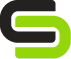
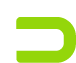

In [ ]:
soup = BeautifulSoup(html, features="html.parser")
print(soup)

Найдите все узлы href на странице

[<a href="/"><img alt="СтройДиам" data-src="" src="/upload/CMax/4c8/xnatm08d54rvrbbt80865ugyphawqaij.png" title="СтройДиам"/></a>, <a class="dropdown-toggle" href="/catalog/">
<div class="link-title color-theme-hover">
<i aria-hidden="true" class="svg inline svg-inline-icon_catalog"><svg height="10" viewbox="0 0 10 10" width="10" xmlns="http://www.w3.org/2000/svg"><path class="cls-1" d="M644,76a1,1,0,1,1-1,1A1,1,0,0,1,644,76Zm4,0a1,1,0,1,1-1,1A1,1,0,0,1,648,76Zm4,0a1,1,0,1,1-1,1A1,1,0,0,1,652,76Zm-8,4a1,1,0,1,1-1,1A1,1,0,0,1,644,80Zm4,0a1,1,0,1,1-1,1A1,1,0,0,1,648,80Zm4,0a1,1,0,1,1-1,1A1,1,0,0,1,652,80Zm-8,4a1,1,0,1,1-1,1A1,1,0,0,1,644,84Zm4,0a1,1,0,1,1-1,1A1,1,0,0,1,648,84Zm4,0a1,1,0,1,1-1,1A1,1,0,0,1,652,84Z" data-name="Rounded Rectangle 969 copy 7" transform="translate(-643 -76)"></path></svg></i>																Каталог							</div>
</a>, <a class="color-theme-hover" href="/catalog/almaznyy-instrument/" title="Алмазный инструмент">
<span class="name option-font-bold">Алмазный инстру
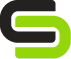
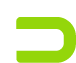

In [ ]:
hrefs = soup.findAll('a')
print(hrefs)

Сохраните полные адреса сслыкок в список


Подсказка: используйте `urljoin`

In [ ]:
links = [urljoin(url, link.get('href')) for link in hrefs]
print(len(links))
links

517


['https://stroydiam.ru/',
 'https://stroydiam.ru/catalog/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/almaznye-segmentnye-diski-po-betonu-i-zhelezobetonu/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/almaznye-otreznye-krugi-dlya-mokroy-rezki-tip-korona/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/almaznye-otreznye-krugi-dlya-sukhoy-rezki-tip-turbo/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/diski-po-betonu-i-zhelezobetonu/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/almaznye-segmentnye-krugi-po-asfaltu/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/almaznye-segmentnye-diski-po-granitu/',
 'https://stroydiam.ru/catalog/almaznyy-instrument/almaznye-diski/diski-dlya-plitkorezov/',
 'https://stroydiam.ru/catalog/almaznyy-instrume

Какие ссылки соответствуют карточкам товаров? Выберите все такие ссылки. Для этого напишем функцию фильтрации, которая будет определять, является ли ссылка корректной

In [ ]:
from urllib.parse import unquote
def filter(links, keyword='https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/', stopwords=[]):
    filtered_links = []
    new_links = []
    for link in links:
        new_link = unquote(link)
        if keyword in new_link:
            flag_check = True
            if len(new_link) <= len('https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-50-beton-wet-siniy-dia',):
              flag_check = False
            if flag_check:
                filtered_links.append(link)
                new_links.append(new_link)
    return filtered_links, new_links

In [ ]:
filtered_links, new_links = filter(links)
print(len(new_links))
new_links

36


['https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-50-beton-wet-siniy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-50-beton-wet-siniy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-100-beton-wet-zheltyy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-100-beton-wet-zheltyy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-200-beton-wet-oranzhevyy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-200-beton-wet-oranzhevyy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-

 На странице могло быть несколько ссылок, ведущих на одну и ту же карточку товара. Избавьтесь от дубликатов в списке ссылок

In [ ]:
filtered_new_links = set(new_links)
filtered_new_links

{'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-100-almaznyy-gibkiy-shlifovalnyy-krug-po-betonu-d-100-2-2',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-200-almaznyy-gibkiy-shlifovalnyy-krug-po-betonu-d-100-2-2',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-3000-almaznyy-gibkiy-shlifovalnyy-krug-po-betonu-d-100-2-2',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-400-almaznyy-gibkiy-shlifovalnyy-krug-po-betonu-d-100-2-2',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-100-beton-wet-zheltyy-diamaster',
 'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-d-100-2-0-1500-beton-wet-goluboy-diamaster',
 'https://stroydiam.ru/catal

Сколько получилось ссылок?

In [ ]:
print(len(filtered_new_links))

18


Теперь, когда у нас есть ссылки на товары, давайте проанализируем, что этот магазин продает. Откройте страницу товара и посмотрите, какая информация там представлена и какую информацию вы хотите сохранить. **Обязательные** колонки:

- Название
- Картинка
- Характеристики (минимум 1) - для одежды это может быть ткань, из которой  она сшита, для семян овощей - срок созревания и.т.д.
- Описание

Можно **(и даже стоит)** добавить больше колонок, если получается выгрузить такую информацию.

In [ ]:
columns = ['Название', 'Диаметр', 'Материал', 'Высота алмазного слоя, мм', 'Описание']

Напишите функцию, которая принимает ссылку на страницу и возвращает все необходимые признаки. Для этого давайте поймем, как работать сначала с одной ссылкой

Выберите первую ссылку из списка

In [ ]:
filtered_new_links = list(filtered_new_links)
url = filtered_new_links[0]

Распечатайте ее

In [ ]:
filtered_new_links[0]

'https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-master-line-d-100-2-0-50-granit-mramor-wet-diam'

Используя библиотеку `requests` загрузите данные по сслыке и распартье их, как вы это делали ранее

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ru" lang="ru"  >
<head><link rel="canonical" href="https://stroydiam.ru/catalog/almaznyy-instrument/shlifovalniy-instrument-po-betonu/agshk-po-betonu/agshk-master-line-d-100-2-0-50-granit-mramor-wet-diam" />
	<title>Алмазный гибкий шлифовальный круг (АГШК) Diam Master Line 100*2 №50 гранит/мрамор | СтройДиам</title>
	<meta name="viewport" content="initial-scale=1.0, width=device-width" />
	<meta name="HandheldFriendly" content="true" />
	<meta name="yes" content="yes" />
	<meta name="apple-mobile-web-app-status-bar-style" content="black" />
	<meta name="SKYPE_TOOLBAR" content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" />
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta name="keywords" content="алмазный гибкий шлифовальный круг (агшк) diam master line 100*2 №50 гранит/мрамор" />
<meta name="description" content="Купить алмазный гибкий шлифовальный круг (агшк) diam master line 100*2 №50 гранит/мрамор 
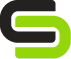
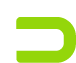

In [ ]:
response = urlopen(url)
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, features="html.parser")
print(html)

Посмотрите на полученные данные. В каком узле находится название товара? Сохраните этот узел и достаньте название товара

In [ ]:
match = re.search(r'<title>', html)

st, en = match.span()
name = html[en:(html.find('|', en))].strip()
name

'Алмазный гибкий шлифовальный круг (АГШК) Diam Master Line 100*2 №50 гранит/мрамор'

Проделайте аналогичные шаги, чтобы получить информацию для оставшихся колонок

In [ ]:
match = re.search(r'Диаметр</span>', html)

st, en = match.span()
diameter = html[(en+156):(en+159)]
diameter

'100'

In [ ]:
match = re.search(r'Материал</span>', html)

st, en = match.span()
material = html[(en+156):(en+175)]
material

'Гранит, Мрамор\t\t\t\t\t'

Достаньте описание товара

In [ ]:
match = re.search(r'<meta itemprop="description"', html)

st, en = match.span()
description = html[(en+14):(html.find('/', en))].strip()

In [ ]:
description

'DIAM MasterLine Wet 100&nbsp;- универсальные алмазные гибкие шлифовальные круги для шлифовки и полировки поверхностей из всех видов натурального и искусственного камня. Применяются на УШМ, 9 этапов, от зерна мэш 30 до BUFF. Подходят только для работы с водяным охлаждением. Диаметр 100 мм. Система крепления «Velcro» (липучка)."'

Если сайт соответсвует требованиям, то тут должно содержаться много полезной информации, которая не попала в карточку товара, но может быть интересна при исследовании. Выберите какую-нибудь часто встречающуюся в описаниях товаров характеристику и попробуйте вытащить информацию о ней с помощью регулярного выржения. Например, для плодовых культур такой харатеристикой может быть срок созревания первых плодов

Характеристика: <font color='violet'> Высота алмазного слоя </font>

In [ ]:
match = re.search(r'Высота алмазного слоя, мм</span>', html)

st, en = match.span()
height = html[(en+156):(en+157)]
height

'2'

Оформите полученные данные в датафрейм при помощи `Pandas`. Выведите записи.

In [ ]:
data = []

for link in filtered_new_links:
  response = urlopen(link)
  html = response.read().decode('utf-8')

  match = re.search(r'<title>', html)
  st, en = match.span()
  name = html[en:(html.find('|', en))].strip()

  match = re.search(r'Диаметр</span>', html)
  st, en = match.span()
  diameter = html[(en+156):(en+159)]

  match = re.search(r'Материал</span>', html)
  st, en = match.span()
  material = html[(en+156):(en+175)]

  match = re.search(r'Высота алмазного слоя, мм</span>', html)
  st, en = match.span()
  height = html[(en+156):(en+157)]

  match = re.search(r'<meta itemprop="description"', html)
  st, en = match.span()
  description = html[(en+14):(html.find('/', en))].strip()

  data.append([name, diameter, material, height, description])

df = pd.DataFrame(data, columns=columns)
df

Название Диаметр  \
0   Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
1   Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
2   Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
3   Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
4   Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
5   Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
6   Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
7   Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
8   Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
9   Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
10  Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
11  Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
12  Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
13  Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
14  Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
15  Алмазный гибкий шлифовальный круг (АГШК) Diam ...     100   
16  Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   
17  Алмазный гибкий шлифовальный круг (АГШК) DIAMA...     100   

                             Материал Высота алмазного слоя, мм  \
0            Гранит, Мрамор\t\t\t\t\t                         2   
1            Гранит, Мрамор\t\t\t\t\t                         2   
2   Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
3   Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
4            Гранит, Мрамор\t\t\t\t\t                         2   
5            Гранит, Мрамор\t\t\t\t\t                         2   
6   Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
7   Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
8   Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
9   Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
10  Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
11           Гранит, Мрамор\t\t\t\t\t                         2   
12  Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
13           Гранит, Мрамор\t\t\t\t\t                         2   
14  Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
15           Гранит, Мрамор\t\t\t\t\t                         2   
16  Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   
17  Бетон\t\t\t\t\t\t\t\t\t\t\t\t\t\t                         2   

                                             Описание  
0   DIAM MasterLine Wet 100&nbsp;- универсальные а...  
1   DIAM MasterLine Wet 100&nbsp;- универсальные а...  
2   Алмазный гибкий шлифовальный круг (черепашка)&...  
3   Алмазный гибкий шлифовальный круг (черепашка)&...  
4   зный гибкий шлифовальный круг&nbsp;Diam Master...  
5   зный гибкий шлифовальный круг&nbsp;Diam Master...  
6   Алмазный гибкий шлифовальный круг (черепашка)&...  
7   Алмазный гибкий шлифовальный круг (черепашка)&...  
8   Алмазный гибкий шлифовальный круг (черепашка)&...  
9   Алмазный гибкий шлифовальный круг (черепашка)&...  
10  Алмазный гибкий шлифовальный круг (черепашка)&...  
11  зный гибкий шлифовальный круг&nbsp;Diam Master...  
12  Алмазный гибкий шлифовальный круг (черепашка)&...  
13  зный гибкий шлифовальный круг&nbsp;Diam Master...  
14  Алмазный гибкий шлифовальный круг (черепашка)&...  
15  ЗНЫЙ ГИБКИЙ ШЛИФОВАЛЬНЫЙ КРУГ (АГШК) серии Mas...  
16  Алмазный гибкий шлифовальный круг (черепашка)&...  
17  Алмазный гибкий шлифовальный круг (черепашка)&...

Посмотрите на колонку, которая получилась после парсинга описания с помощью регулярных выражений и **ответьте на вопросы**:
1. Сколько получилось заполненных ячеек? Сколько это составляет процентов от общего количества?
2. Во всех ли ячейках адекватная информация?
3. Если что-то некорректно заполнилось, то почему такое произошло?

<font color='violet'> \# Кайф, все вроде корректно заполнилось, жаль только я не знаю как убрать эти \t\t\t. Ну и неожиданно выяснилось, что диаметр и высота алмазного слоя у всех одинаковые </font>

# Часть 2. Изучение ограничений парсинга. 1 балл.

В рамках изучения конкурентов мы также узнали, что у них есть магазины **на Ozon**. Преисполнившись уверенностью после легкого парсинга сайта-магазина конкурентов, мы решили, что теперь мы готовы парсить большие маркетплейсы. В следующих ячейках попробуй проделать те же шаги, которые делались в части 1 этой лабораторной работы.

Запишем ссылку на товар компании-конкурента. Попробуем обратиться к ней через response; после этого посмотрим на ответ. Если в ответе есть русские символы, то проверим кодировку - чтобы они корректно отображались, строка должна быть в utf-8. Для этого могут помочь методы `encode` и `decode`.

Примеры подходящих ссылок согласно примерам из части 1 этой лабораторной:

- Семена кабачков 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'

In [ ]:
url_ozon = 'https://www.ozon.ru/product/nabor-diskov-dlya-mini-ushm-9-sht-75-76h10-mm-1560850156/'
response = urlopen(url_ozon)
html = response.read().decode('utf-8')

HTTPError: HTTP Error 307: The HTTP server returned a redirect error that would lead to an infinite loop.
The last 30x error message was:
Temporary Redirect

Выведи текст ответа

Какую страницу вывело? Та ли эта страница, которая доступна по ссылке в браузере?

Изучи в интернете, что привело к такому результату и какие есть способы обхода этой ошибки. **Результаты опиши в выводе к этой части.**

Выводы: <font color='violet'> Ничего не получилось, выдает ошибку((( случается бесконечный цикл перенаправлений. Наверно с помощью response это не делается </font>

# Часть 3. Парсинг динамического контента при помощи регулярных выражений. 1 балла.

Теперь, когда мы поняли, что ребята продают, важно понять как они это продают. У веб-магазинов часто есть странички в соцсетях для продвижения бренда. **Главная задача в этой части работы - проанализировать контент.** Для этого будем использовать ютуб :)

Найдите ютуб-канал вашего интернет-магазина. Если такого нет, то подойдет любой канал со схожей тематикой

Название канала: <font color='violet'> BAGO - алмазные диски, чашки, коронки, буры </font>

Сохраните ссылку на страничку с роликами на этом канале

In [ ]:
url = 'https://www.youtube.com/@bago74/videos'

Распарсьте страничку с помощью `bs4` и выведите список видео этого канала


In [ ]:
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'lxml')
html

'<!DOCTYPE html><html style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="en" darker-dark-theme darker-dark-theme-deprecate system-icons typography typography-spacing refresh><head><script data-id="_gd" nonce="S4bNlgodRmd2a8-KXEu3QQ">window.WIZ_global_data = {"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20241204.10_p0","fPDxwd":[],"iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"188588736":true,"691955189":true,"651175828":false,"653718497":false,"660014094":false},"u4g7r":"%.@.null,1000,2]","xnI9P":true,"xwAfE":true,"yFnxrf":2486};</script><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="origin-trial" content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnV

In [ ]:
soup

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="en" refresh="" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="S4bNlgodRmd2a8-KXEu3QQ">window.WIZ_global_data = {"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20241204.10_p0","fPDxwd":[],"iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"188588736":true,"691955189":true,"651175828":false,"653718497":false,"660014094":false},"u4g7r":"%.@.null,1000,2]","xnI9P":true,"xwAfE":true,"yFnxrf":2486};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" h

я хз как это без селениума сделать(((((

Для парсинга можно использовать различные подходы

Используя знания о том, что `html` документ - это дерево, попробуйте достать названия видео, как вы извлекали характеристики товаров в предыдущей части. Здесь постарайтесь не использовать регулярные выражения или поясните, почему не получается извлечь информацию без них

In [ ]:
#TODO

<script nonce="jUh0eRn8Fvch5GAwVTqLCQ">var ytInitialData = {"responseContext":{"serviceTrackingParams":[{"service":"GFEEDBACK","params":[{"key":"route","value":"channel.videos"},{"key":"is_casual","value":"false"},{"key":"is_owner","value":"false"},{"key":"is_alc_surface","value":"false"},{"key":"browse_id","value":"UCwmXF9H4u7KmJwqUwHcCQow"},{"key":"browse_id_prefix","value":""},{"key":"logged_in","value":"0"},{"key":"e","value":"9407157,23804281,23946420,23966208,23998056,24004644,24007613,24077241,24166867,24173288,24181174,24241378,24290971,24439361,24453989,24456089,24459436,24466624,24468724,24542367,24548627,24548629,24550458,24566687,24699899,39325347,39325801,39325818,39325854,39326323,39326376,39326395,39326418,39326462,39326498,39326516,39326587,39326596,39326610,39326620,39326642,39326681,39326794,39326848,39326860,51009781,51010235,51016856,51017346,51020570,51025415,51030101,51033765,51037346,51037353,51041512,51050361,51053689,51057846,51057851,51060353,51063643,51064835

Используя регулярные вырежения извлеките названия видео из целого `html` документа

In [ ]:
#TODO

['КАК ДЕШЕВО ВЫЛЕЧИТЬ ЛЮБЫЕ БОЛЕЗНИ РАСТЕНИЙ?', 'ТОП-10 ПОЛЕЗНЫХ СОВЕТОВ для ОГОРОДА в ИЮЛЕ', 'В ЭТО СТОИТ ВЛОЖИТЬСЯ! Капельный полив', 'ЧТО ПОСЕЯТЬ в ИЮЛЕ и СОБРАТЬ УРОЖАЙ в 2024?', 'МУЧНИСТАЯ РОСА на ОГУРЦАХ, СМОРОДИНЕ, РОЗАХ, КРЫЖОВНИКЕ... ЧЕМ ЛЕЧИТЬ?', 'КАК ИЗБАВИТЬСЯ ОТ МУРАВЬЕВ НАВСЕГДА? Спойлер: никак', 'ПОСЛЕ ЭТОГО ТОМАТЫ НЕ ЗАБОЛЕЮТ! Профилактика болезней томатов', 'КАК ЛЕЧИТЬ СКРУЧЕННЫЕ ЛИСТЬЯ НА ТОМАТАХ?', 'ФОРМИРОВКА ТОМАТОВ  1, 2, 3, 4 СТЕБЛЯ!', 'НЕ ПРИМЕНЯЙТЕ ФИТОВЕРМ ПОКА НЕ ПОСМОТРИТЕ ВИДЕО!', 'УДОБРЕНИЯ НА ЛЕТО! Что нужно иметь в запасе?', 'ЧТО СЕЯТЬ В ИЮНЕ?!', 'У ВАС ТОЧНО ВЫРАСТЕТ АРБУЗ! Все о выращивании арбузов', 'ПРАВИЛА ПОСАДКИ КЛУБНИКИ ВЕСНОЙ!', 'ВАЖНО ЗНАТЬ ПРИ ВЫСАДКЕ ЦВЕТОВ!', 'ВЗОЙДЕТ ЛЮБАЯ МОРКОВЬ! Посев на богатый урожай', 'ПРОСТЫЕ ПРАВИЛА ПОСАДКИ КАРТОФЕЛЯ!', 'КАК ВЫСАДИТЬ ТОМАТЫ, ЕСЛИ ВЫТЯНУЛИСЬ? Посадка лежа', 'СДЕЛАЙТЕ ЭТО ПЕРЕД ВЫСАДКОЙ РАССАДЫ!', 'УСПЕВАЙТЕ! Что посеять в мае?', 'УКРОП, ПЕТРУШКА, БАЗИЛИК ВЗОЙДУТ ДРУЖНО! Если знать...', 'ПРОВОЛОЧНИК У

Напишите выводы, отвечая на следующие вопросы

1. Какой из рассмотренных методов в данной ситуации подходит лучше и почему?
2. Получилось ли у вас загрузить все видео с канала за один запрос? Поясните полученные результаты
3. Когда стоит использовать регулярные выражения, а когда хождение по дереву с помощью `bs4`? Приведите примеры
4. С какими проблемами вы столкнулись во время работы и почему они возникли?

<font color='violet'> у меня не получилось( но дальше я это сделаю (используя селениум) </font>

# Часть 4. Парсинг динамическго контента при помощи selenium. 2 балла.

Немного магии из интеренета, чтобы другая магия заработала

In [ ]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/131/chromedriver'

In [ ]:
# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
url = 'https://www.youtube.com/@bago74/videos'
driver.get(url)

Используя библиотеку `BY` найдите названия видео

In [ ]:
videos = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-rich-grid-media')
titles = []

for video in videos:
  title = video.find_element(By.ID, 'video-title')
  titles.append(title.text)
print(len(titles))
titles

30


['Установка алмазного бурения KEOS KS 250 Jset KS 250JSET',
 'Обзор систем алмазного бурения на рынке 2024 год',
 'Диски для штроборезов HILBERG и TRIO DIAMOND',
 'Штроборезы Crown и Alteco на 150мм диск',
 'MITEX 2024. Crown',
 'Видеобзор MITEX 2024',
 'Электроинструмент для работы с металлом ALTECO: УШМ AG 1400-125 ECS 70003 и ПШМ DG 550-25 E 67931',
 'Сухое алмазное бурение, системы пылеудаления EXLA, TRIO-DIAMOND',
 "Вакуумная присоска TRIO-DIAMOND Power 8' (205 мм) 282250",
 'Набор кондиционерщика на базе дрели Crown, резьба М22',
 'Наборы инструмента STALKER',
 'Коронки алмазные для кондиционеров, HILBERG, ALTECO',
 'Алмазные диски для плоскорезов Wandeli',
 'Системы пылеудаления для сухого алмазного сверления',
 'Электрическая воздуходувка ALTECO EB 650 35463 #shorts',
 'Тепловая пушка (тепловентилятор) ALTECO для дома, квартиры и офиса #shorts',
 'Резка керамогранита под 45 градусов, обзор необходимого инструмента',
 'Обзор на АГШК (Черепашки), инструмент для шлифовки',
 'Резчи

Получилось ли загрузить все видео? Почему?

<font color='violet'> Всего видео 36, а загрузилось только 30. Наверно просто страница не вся прогрузилась </font>

Используя методы `selenium` сделайте так, чтобы прогрузилась вся страничка с видео канала и соберите названия видео

In [ ]:
old_height = 0

while True:
  driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
  time.sleep(2)

  new_height = driver.execute_script("return document.documentElement.scrollHeight")
  if new_height == old_height:
    break
  old_height = new_height

videos = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-rich-grid-media')
titles = []

for video in videos:
  title = video.find_element(By.ID, 'video-title')
  titles.append(title.text)
print(len(titles))
titles

36


['Установка алмазного бурения KEOS KS 250 Jset KS 250JSET',
 'Обзор систем алмазного бурения на рынке 2024 год',
 'Диски для штроборезов HILBERG и TRIO DIAMOND',
 'Штроборезы Crown и Alteco на 150мм диск',
 'MITEX 2024. Crown',
 'Видеобзор MITEX 2024',
 'Электроинструмент для работы с металлом ALTECO: УШМ AG 1400-125 ECS 70003 и ПШМ DG 550-25 E 67931',
 'Сухое алмазное бурение, системы пылеудаления EXLA, TRIO-DIAMOND',
 "Вакуумная присоска TRIO-DIAMOND Power 8' (205 мм) 282250",
 'Набор кондиционерщика на базе дрели Crown, резьба М22',
 'Наборы инструмента STALKER',
 'Коронки алмазные для кондиционеров, HILBERG, ALTECO',
 'Алмазные диски для плоскорезов Wandeli',
 'Системы пылеудаления для сухого алмазного сверления',
 'Электрическая воздуходувка ALTECO EB 650 35463 #shorts',
 'Тепловая пушка (тепловентилятор) ALTECO для дома, квартиры и офиса #shorts',
 'Резка керамогранита под 45 градусов, обзор необходимого инструмента',
 'Обзор на АГШК (Черепашки), инструмент для шлифовки',
 'Резчи

Какая еще информация может быть полезна при анализе конкурентов? Попробуйте достать эту информацию с канала с помощью библиотеки `selenium` и поясните, почему вам нужны именно эти данные:

<font color='violet'> Описания видео. А что еще вообще можно достать с канала. Может были бы полезны комментари под видео, но на этом канале их нет </font>


 Прежде чем приступить к заданию предложите другие методы получения этих данных и подумайте, почему вам необходимо использовать именно `selenium`:


<font color='violet'> Другие методы из этой лабы, как я уже убедилась, не работают, так что по-другому никак (ну разве что вручную смотреть все это, но уж точно не для этого я сейчас делаю эту лабу) </font>

Теперь, когда вы понимаете, что и зачем вы будете делать, можно приступать. Напишите необходимый код

In [ ]:
old_height = 0

while True:
  driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
  time.sleep(2)

  new_height = driver.execute_script("return document.documentElement.scrollHeight")
  if new_height == old_height:
    break
  old_height = new_height

videos = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-rich-grid-media')
video_links = [item.find_element(By.TAG_NAME, "a").get_attribute("href") for item in videos]
descriptions = []
titles = []

for video in videos:
  title = video.find_element(By.ID, 'video-title')
  titles.append(title.text)

video_links


['https://www.youtube.com/watch?v=yElkoRWk8W0',
 'https://www.youtube.com/watch?v=Z45IKw4uYLg',
 'https://www.youtube.com/watch?v=KnMxj55MqHM',
 'https://www.youtube.com/watch?v=qXrmeeceEoY',
 'https://www.youtube.com/watch?v=AO8Yaz2uIKM',
 'https://www.youtube.com/watch?v=CYM2Y1QAU0k',
 'https://www.youtube.com/watch?v=_NoYk45V2Eg',
 'https://www.youtube.com/watch?v=9mWlo4gg6YA',
 'https://www.youtube.com/watch?v=vBv96DbAunY',
 'https://www.youtube.com/watch?v=lVa0oVC7hNo',
 'https://www.youtube.com/watch?v=5MVYUabkJN0',
 'https://www.youtube.com/watch?v=DPEOi0oov_Y',
 'https://www.youtube.com/watch?v=NHRzshDV2BE',
 'https://www.youtube.com/watch?v=aYG9uz70uHw',
 'https://www.youtube.com/watch?v=2IDRjaMn4Kg',
 'https://www.youtube.com/watch?v=YlvHtcgDsyg',
 'https://www.youtube.com/watch?v=HWzi9vOPXPQ',
 'https://www.youtube.com/watch?v=vjDHVFpvReI',
 'https://www.youtube.com/watch?v=JP2VI_D-URo',
 'https://www.youtube.com/watch?v=9HPtAPebehE',
 'https://www.youtube.com/watch?v=AjR870

In [ ]:
driver.get(url)
old_height = 0

while True:
  driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
  time.sleep(2)

  new_height = driver.execute_script("return document.documentElement.scrollHeight")
  if new_height == old_height:
    break
  old_height = new_height

videos = driver.find_elements(By.CLASS_NAME, 'style-scope ytd-rich-grid-media')
video_links = [item.find_element(By.TAG_NAME, "a").get_attribute("href") for item in videos]
descriptions = []
titles = []

for video in videos:
  title = video.find_element(By.ID, 'video-title')
  titles.append(title.text)

for link in video_links:
  driver.get(link)
  description = driver.find_element(By.CSS_SELECTOR, "#description") #тут видимо ошибка, но я не знаю как правильно
  descriptions.append(description.text)
  driver.back()

descriptions

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [ ]:
driver.close()

<font color='red'> Не забудь закрыть сессию браузера selenium! Каждый день умирают 10 морских котиков из-за того, что беспечные программисты забывают закрывать сессии и чистить за собой данные. Если не закроешь - снимем много баллов! </font>

Сделайте выводы:

1. Какова тематика канала? Какой контент преобладает на канале?
2. Если бы вы создавали аналогичный магазин, с каким содержанием ролики вам стоило бы выпускать?
3. Какие выводы вы можете сделать из собранных вами данных? Оказались ли эти данные полезны или стоило потратить время на сбор другой информации?

<font color='violet'> В общем не получилось у меня достать описания (хотя на самом деле там ничего интересного, описания не дали бы буквально никакой информации, так как на этом канале под видео либо нет описания, либо оно невероятно краткое). По названиям видео ясно, что видео на канале - это в основном обзоры на инструменты, которые магазин продает. Если бы мы создавали аналогичный магазин, ролики стоило бы выпускать с таким же содержанием - нужно показать в обзорах преимущества нашей продукции. В общем-то ничего сильно необычного из собранных данных узнать не удалось, разве что список того, что магазин-конкурент продает, может оказаться полезным  </font>

# Часть 5. Получение контента через API. 2 балла.

На семинарах изучались основы взаимодействия с API (если не уверены в своих силах, сейчас самое время погуглить про API самим в интернете). Изучите документацию `API YouTube`, чтобы получить комментарии под видео конкурента через API.

Теперь должно быть примерно понятно, как создать ключ для API. Аутентификация здесь не понадобится, нужен только ключ.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из частей 3-4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [ ]:
yt_api_key = 'bipki'

<font color='violet'> Я не думаю что где-либо можно найти видео про абразивный инструмент, у которого бы было больше тысячи комментариев (я не нашла)... но у меня есть кое-что поинтереснее... </font>

Теперь выбери видео про товар конкурента, в котором **больше тысячи комментариев**. Давай попробуем получить их. Для начала достаточно получить лишь начальные комментарии каждого треда (посмотри в документации `YouTube API`, что такое `commentThreads`).

В следующей ячейке укажи ссылку на видео (скопируй из адресной строки браузера) и получи из неё ID видео.

In [ ]:
video_url = 'https://www.youtube.com/watch?v=dQw4w9WgXcQ'
video_id = 'dQw4w9WgXcQ'

Теперь надо на основе ID видео и ключа API легко получить запрос API, который нам вернёт инфрмацию в формате JSON. Сформируем ссылку, в которой будут находиться необходимые параметры и напишем запрос. Выведем, что вернул запрос

In [ ]:
url_method = f'https://www.googleapis.com/youtube/v3/commentThreads?key={yt_api_key}&videoId={video_id}&part=snippet'

In [ ]:
response = requests.get(url_method)
response.json()

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'Ggxr-FqgQNBKnNavZPuBL5b3IUA',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNLZ2dHQUFTQlFpSElCZ0FFZ1VJaUNBWUFCSUZDSWtnR0FBU0JRaWRJQmdCSWcwS0N3aWdwODI2QmhDb2hNZEQ=',
 'pageInfo': {'totalResults': 20, 'resultsPerPage': 20},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'Y9xWZNQb0Lp711zNEii3M0Y6imw',
   'id': 'UgzarqjaaPC7TbFINNx4AaABAg',
   'snippet': {'channelId': 'UCuAXFkgsw1L7xaCfnd5JJOw',
    'videoId': 'dQw4w9WgXcQ',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '84ssLiSJtHPQYosOPk6HTH2AWaU',
     'id': 'UgzarqjaaPC7TbFINNx4AaABAg',
     'snippet': {'channelId': 'UCuAXFkgsw1L7xaCfnd5JJOw',
      'videoId': 'dQw4w9WgXcQ',
      'textDisplay': '1 BILLION views for Never Gonna Give You Up!\xa0 Amazing, crazy, wonderful! Rick ♥️',
      'textOriginal': '1 BILLION views for Never Gonna Give You Up!\xa0 Amazing, crazy, wonderful! Rick ♥️',
      'authorDisplayName': '@RickAstleyYT',
    

In [ ]:
len(re.findall(r'textOriginal', json.dumps(response.json()))) #кол-во комментов

20

In [ ]:
response = requests.get(url_method)
all_comm = response.json()

comments = []

item_comms = all_comm.get('items', [])
for comment in item_comms:
  text_comm = comment['snippet']['topLevelComment']['snippet']['textDisplay']
  comments.append(text_comm)

comments

['1 BILLION views for Never Gonna Give You Up!\xa0 Amazing, crazy, wonderful! Rick ♥️',
 'lol',
 'You know what, I&#39;m not even mad lol, this song rocks',
 'where are my free robux',
 'Anyone in 2025?',
 'Hello &gt;:D 👉👈',
 'Кто здесь посылки от Лололошки',
 '15 years ago random song<br>2024 worlds greates meme',
 'Somon in 2024?',
 '1.599B after years, almost got 1.6B, pls can joined the video pls',
 '50 zł',
 'memer',
 'А какой сайт там выходят разные сайты',
 'who paid for this ad',
 'just rickrolled my husbands ex gf LMAOOO',
 'Waiting for 1.6B',
 'I just rickrolled myself :/',
 '1988: Damn, this song is good<br>2019: Damn, this song is good<br>2024: Damn, i miss the internet',
 'No one can escape from rickrolled, even Rick himself.',
 'HAHA, RICKROLLED']

In [ ]:
comments = []
url_method = f'https://www.googleapis.com/youtube/v3/commentThreads?key={yt_api_key}&videoId={video_id}&part=snippet'

for i in range (5):
  response = requests.get(url_method)
  all_comm = response.json()

  item_comms = all_comm.get('items', [])
  for comment in item_comms:
    text_comm = comment['snippet']['topLevelComment']['snippet']['textDisplay']
    comments.append(text_comm)

  page_token = all_comm.get('nextPageToken')
  if page_token:
    url_method = f'https://www.googleapis.com/youtube/v3/commentThreads?key={yt_api_key}&videoId={video_id}&part=snippet&pageToken={page_token}'
  else:
    break

comments

['1 BILLION views for Never Gonna Give You Up!\xa0 Amazing, crazy, wonderful! Rick ♥️',
 'CTF-тен қанша рет келдім осы жерге 😁',
 'U rickrolled🤡🤡🤡',
 '2024❤',
 'Beluga &amp; Hecker',
 'I got Rick rolled from trailmakers',
 'lol',
 'You know what, I&#39;m not even mad lol, this song rocks',
 'where are my free robux',
 'Anyone in 2025?',
 'Hello &gt;:D 👉👈',
 'Кто здесь посылки от Лололошки',
 '15 years ago random song<br>2024 worlds greates meme',
 'Somon in 2024?',
 '1.599B after years, almost got 1.6B, pls can joined the video pls',
 '50 zł',
 'memer',
 'А какой сайт там выходят разные сайты',
 'who paid for this ad',
 'just rickrolled my husbands ex gf LMAOOO',
 'Waiting for 1.6B',
 'I just rickrolled myself :/',
 '1988: Damn, this song is good<br>2019: Damn, this song is good<br>2024: Damn, i miss the internet',
 'No one can escape from rickrolled, even Rick himself.',
 'HAHA, RICKROLLED',
 'Poor rhythm, unsteady breath, off-pitch... that&#39;s all me...',
 'I just got rick roll :o'

Сколько комментариев получилось спарсить в рамках одного запроса? Это все комментарии, которые есть на страничке?

Какой есть ключ в ответе на запрос, чтобы получить больше комментариев?

<font color='violet'> В рамках одного запроса парсятся 20 комментариев. Ключ - nextPageToken </font>

Дело осталось за малым. Укажем, какой максимум комментариев можно получить за один запрос; допишем код в цикле, чтобы получить все комментарии и положить их в список `comments_lst`.  

В цикле **обязательно** используй try и catch, чтобы ловить ошибки - глюки и ошибки случаются, будет неприятно, если это повлияет на код

In [ ]:
comments_lst = []
url_method = f'https://www.googleapis.com/youtube/v3/commentThreads?key={yt_api_key}&videoId={video_id}&part=snippet'

for i in range (100): # вообще здесь должно быть while True, но под видео больше 2 миллионов комментариев, так что мне кажется, что код закончит работать когда дедлайн лабы уже пройдет, а этого бы не хотелось
  try:
    response = requests.get(url_method)
    response.raise_for_status()
    all_comm = response.json()

    item_comms = all_comm.get('items', [])
    for comment in item_comms:
      text_comm = comment['snippet']['topLevelComment']['snippet']['textDisplay']
      comments_lst.append(text_comm)

    page_token = all_comm.get('nextPageToken')
    if page_token:
      url_method = f'https://www.googleapis.com/youtube/v3/commentThreads?key={yt_api_key}&videoId={video_id}&part=snippet&pageToken={page_token}'
    else:
      break
  except requests.exceptions.RequestException as e:
    print(f"error: {e}")
    break
comments_lst

['1 BILLION views for Never Gonna Give You Up!\xa0 Amazing, crazy, wonderful! Rick ♥️',
 'CTF-тен қанша рет келдім осы жерге 😁',
 'U rickrolled🤡🤡🤡',
 '2024❤',
 'Beluga &amp; Hecker',
 'I got Rick rolled from trailmakers',
 'lol',
 'You know what, I&#39;m not even mad lol, this song rocks',
 'where are my free robux',
 'Anyone in 2025?',
 'Hello &gt;:D 👉👈',
 'Кто здесь посылки от Лололошки',
 '15 years ago random song<br>2024 worlds greates meme',
 'Somon in 2024?',
 '1.599B after years, almost got 1.6B, pls can joined the video pls',
 '50 zł',
 'memer',
 'А какой сайт там выходят разные сайты',
 'who paid for this ad',
 'just rickrolled my husbands ex gf LMAOOO',
 'Waiting for 1.6B',
 'I just rickrolled myself :/',
 '1988: Damn, this song is good<br>2019: Damn, this song is good<br>2024: Damn, i miss the internet',
 'No one can escape from rickrolled, even Rick himself.',
 'HAHA, RICKROLLED',
 'Poor rhythm, unsteady breath, off-pitch... that&#39;s all me...',
 'I just got rick roll :o'

In [ ]:
len(comments_lst)

2000

Изучи полученный список комментариев `comments_lst`. Сделайте выводы:

1. Как люди реагируют на содержание ролика? Что они отмечают в комментариях чаще всего, что было бы важно для вас как человека, открывающего магазин в этой сфере?
2. Предложите метод(-ы) фильтрации неинформативных комментариев. Какая ожидается точность, много ли комментариев на самом деле нужных будет отсеяно? Какие есть ограничения у метода(-ов)?
3. Сравните применение API и скрапинга динамической страницы при помощи selenium (комментарии YouTube так же можно скрапить, как вы делали в части 4). Какие ограничения у способов, какой вам нравится больше?

<font color='violet'>
Чаще всего в комментариях люди отмечают то, что их зарикроллили. Ну а если бы я выбрала видео, посвященное абразивному инструменту, там скорее всего было бы много комментариев с мнением людей о товаре. Это полезные комментарии. Но были бы и неинформативные комментарии вроде "спасибо за обзор". Их можно было бы отфильтровать по длине комментария (короткие убрать), тогда из полезных комментариев вряд ли бы много отсеялось.

API использовать удобнее, чем selenium. Про ограничения в выводах напишу
</font>

# Выводы. 1 балл

В рамках выводов тебе нужно:
- Подытожить результаты экспериментов в частях 1 - 5 лабораторной работы
- Объяснить, как каждый из методов, перечисленных в данной лабораторной работе, используется на практике, какие у него ограничения. Приведи примеры.
- Поделиться впечатлениями от лабораторной работы - что тебе понравилось,  что узнал нового; а что далось тяжелее всего.

<font color='violet'> Итак, пусть и не все у меня получилось, но я старалась. В первой части я парсила страничку при помощи регулярных выражений - сложно, надо делать все вручную - искать регулярные выражения, определять с какого символа по какой лежит нужная информация, но вроде все получилось. Во второй части выяснилось, что с озона парсить не так-то просто и ничего не получилсь. В третьей части у меня просто ничего не получилось - там явно предполагалось, что надо выполнить задание без selenium или API, но я так не умею. В четвертой части надо было с помощью selenium спарсить названия видео с канала на ютубе. Это у меня получилось, но вот описания видео почему-то взять не получилось, хоть я и долго пыталась. Пятая часть самая понятная и приятная, с помощью API достать комментарии, классно все получилось. </font>

<font color='violet'> Selenium позволяет скрапить динамические страницы, а методы из пунктов 1-3 видимо не позволяют.
API может предоставить доступ только к определенным данным, которые разработчики выбрали для публикации. А для скрапинга таких ограничений нет. Но API удобнее, чем selenium, так что когда можно использовать API, лучше использовать его. А если данные не доступны с помощью API, то их можно соскрапить </font>

<font color='violet'> Лаба очень классная, много нового узнала, пока ее делала </font>

# Бонусное задание (2 балла)

В рамках части 2 этой лабораторной работы мы поняли, что не всегда сайты готовы легко делиться данными. Изучив варианты, мы узнали, что есть разные варианты, как обойти ограничение.

**Задача**: обойди это ограничение на OZON в рамках кода на питоне. Нужно спарсить удачно хотя бы одну страничку.

Как один из возможных вариантов - изучи библиотеку https://github.com/ultrafunkamsterdam/undetected-chromedriver

In [ ]:
# TODO